# Revisiting Python Data Analysis for 2018

In [2]:
print("yo I did a thing")

yo I did a thing


## Introduction

At Pycon 2018 we learned a lot about the current state of data analysis using python.  This talk is our effort to share the important things that we learned so that we might apply them at the GBO.

## Resources

   * [Pycon 2018 Channel](https://www.youtube.com/channel/UCsX05-2sVSH7Nx3zuk3NYuQ)
   * [Pandas for data science tutorial](https://github.com/justmarkham/pycon-2018-tutorial), [video](https://www.youtube.com/watch?v=0hsKLYfyQZc)
   * [DASK tutorial](https://github.com/TomAugspurger/dask-tutorial-pycon-2018), [video](https://www.youtube.com/watch?v=_UWRQZ3nFm0)
   * [Intro to Python for Data Science tutorial](https://github.com/jseabold/pycon-ds-2018), [video](https://www.youtube.com/watch?v=W4WQi2OIy7o&t=94s)
   * [Foundations of Numerical Python tutorial](https://github.com/ssanderson/foundations-of-numerical-computing/tree/master/ansible/files/materials), [video](https://www.youtube.com/watch?v=aGGbnMyeZs0)
   * [Dask and Jupyter Hub talk](https://www.youtube.com/watch?v=Iq72dt1gO9c)
   * [Seven ways to increase performance talk](https://www.youtube.com/watch?v=zQeYx87mfyw)



## Overview of Tools

Here's a brief overview of the tools we'll disucss, most of which we came across recently at Pycon 2018.  Some of them are familiar to us, while others are fairly new.  We'll go into detail about each one later.

   * Numpy - we all know this package; it's still the foundation.
   * Pandas - providing high-performance, easy-to-use data structures and data analysis tools for Python
   * Xarray -  aims to bring the labeled data power of pandas to the physical sciences, by providing N-dimensional variants of the core pandas data structures.
   * Astropy - a common core package for Astronomy in Python
   * Jupyter - what this talk is written in.   Jupyter extends the console-based approach to interactive computing in a qualitatively new direction, providing a web-based application suitable for capturing the whole computation process.

## Numpy

Pure python can be really slow for computations, especially on lists.  As a gross generalization, this is due to:
   * overhead from dynamic typing
   * overhead associated with each element of the list
   
So, Numpy can get you significant improvements, by 1) defining your data type, 2) removing the overhead from the element to just the list (vectorization).  Here's a simple demo that shows off some Jupyter magic:


In [3]:
# define a function for simply doing the dot product of two vectors
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [5]:


%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end



UsageError: Cell magic `%%fortran` not found.


In [10]:

# create a big list
list_data = [float(i) for i in range(10000000)]

In [11]:
# and see how long native python takes
%%time 
python_dot_product(list_data, list_data)

CPU times: user 1.17 s, sys: 4 ms, total: 1.18 s
Wall time: 1.21 s


3.333332833337171e+20

In [12]:
# now see how long numpy takes!
import numpy as np
array_data = np.array(list_data)

In [13]:
%%time
array_data.dot(array_data)

CPU times: user 15 ms, sys: 2 ms, total: 17 ms
Wall time: 17.1 ms


3.333332833334263e+20

### Numpy Review

It helps to keep these things in mind when getting the most out of Numpy:
   * don't use for loops - make sure your algorithms are vectorized
   * UFuncs are those fuctions and operations that can get applied across arrays efficiently, like +, -, or accumulate().
   * Selections: you can still use python list slicing, but remember you can also index with boolean array to filter by a predicate (masking) 
   * Reductions - things like np.mean allow us to perform efficient aggregations over arrays
   * Broadcasting - Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are 'compatible'

## Pandas

"A high-level tool for doing practical, real world data analysis in Python"

Show me, don't tell me; let's just do some example.

In [21]:
# let's examine some health inspection data using pandas
import pandas as pd
fn = "pycon-ds-2018/data/health_inspection_chi.csv"
dta = pd.read_csv(fn)
# we're using pandas DataFrames!
type(dta)


pandas.core.frame.DataFrame

In [15]:
# check this shit out
dta.head()

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_id,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
0,5255 W MADISON ST,RED SNAPPER FISH CHICKEN & PIZZA,CHICAGO,RED SNAPPER FISH CHICKEN & PIZZA,Restaurant,2016-09-26T00:00:00.000,1965287,Canvass,41.880237,1991820.0,"{'type': 'Point', 'coordinates': [-87.75722039...",-87.757220,Pass w/ Conditions,Risk 1 (High),IL,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",60644.0
1,5958 W DIVERSEY AVE,TAQUERIA MORELOS,CHICAGO,TAQUERIA MORELOS,Restaurant,2014-02-06T00:00:00.000,1329698,Canvass,41.931250,2099479.0,"{'type': 'Point', 'coordinates': [-87.77590699...",-87.775907,Pass,Risk 1 (High),IL,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,60639.0
2,5400-5402 N CLARK ST,HAMBURGER MARY'S/MARY'S REC ROOM,CHICAGO,HAMBURGER MARY'S CHICAGO/MARY'S REC ROOM,Restaurant,2010-12-03T00:00:00.000,470787,SFP,41.979884,1933748.0,"{'type': 'Point', 'coordinates': [-87.66842948...",-87.668429,Fail,Risk 1 (High),IL,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",60640.0
3,2804 N CLARK ST,Wells Street Popcorn,CHICAGO,Wells Street Popcorn,Restaurant,2010-02-01T00:00:00.000,68091,Canvass,41.932921,1954774.0,"{'type': 'Point', 'coordinates': [-87.64515454...",-87.645155,Pass,Risk 2 (Medium),IL,NaN,60657.0
4,2409 N WESTERN AVE,CHICAGO CUPCAKE,CHICAGO,CHICAGO CUPCAKE LLC.,Mobile Food Dispenser,2013-05-03T00:00:00.000,1335320,License Re-Inspection,41.925218,2232391.0,"{'type': 'Point', 'coordinates': [-87.68750659...",-87.687507,Fail,Risk 3 (Low),IL,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,60647.0


In [33]:
# our we can get more general info
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 1965287 to 413268
Data columns (total 16 columns):
address            25000 non-null object
aka_name           24709 non-null object
city               24981 non-null object
dba_name           25000 non-null object
facility_type      24787 non-null object
inspection_date    25000 non-null datetime64[ns]
inspection_type    25000 non-null object
latitude           24865 non-null float64
license_           24996 non-null float64
location           24865 non-null object
longitude          24865 non-null float64
results            25000 non-null object
risk               24995 non-null object
state              24994 non-null object
violations         23908 non-null object
zip                24990 non-null float64
dtypes: datetime64[ns](1), float64(4), object(11)
memory usage: 3.9+ MB


In [16]:
# notice that the rows are labeled, but there's no natural index provided by the data as is:
dta.index

RangeIndex(start=0, stop=25000, step=1)

In [24]:
# but we can use the inspection_id as an index, so let's do that
dta = dta.set_index('inspection_id')
dta.index

Int64Index([1965287, 1329698,  470787,   68091, 1335320, 1228169, 1285582,
             557486,   74468, 1522863,
            ...
            2059403,  114871,  657253,  531556,  325228, 2059771, 1965378,
            1490395, 1326565,  413268],
           dtype='int64', name='inspection_id', length=25000)

In [18]:
dta.head()

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
inspection_id,,,,,,,,,,,,,,,,
1965287,5255 W MADISON ST,RED SNAPPER FISH CHICKEN & PIZZA,CHICAGO,RED SNAPPER FISH CHICKEN & PIZZA,Restaurant,2016-09-26T00:00:00.000,Canvass,41.880237,1991820.0,"{'type': 'Point', 'coordinates': [-87.75722039...",-87.757220,Pass w/ Conditions,Risk 1 (High),IL,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",60644.0
1329698,5958 W DIVERSEY AVE,TAQUERIA MORELOS,CHICAGO,TAQUERIA MORELOS,Restaurant,2014-02-06T00:00:00.000,Canvass,41.931250,2099479.0,"{'type': 'Point', 'coordinates': [-87.77590699...",-87.775907,Pass,Risk 1 (High),IL,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,60639.0
470787,5400-5402 N CLARK ST,HAMBURGER MARY'S/MARY'S REC ROOM,CHICAGO,HAMBURGER MARY'S CHICAGO/MARY'S REC ROOM,Restaurant,2010-12-03T00:00:00.000,SFP,41.979884,1933748.0,"{'type': 'Point', 'coordinates': [-87.66842948...",-87.668429,Fail,Risk 1 (High),IL,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",60640.0
68091,2804 N CLARK ST,Wells Street Popcorn,CHICAGO,Wells Street Popcorn,Restaurant,2010-02-01T00:00:00.000,Canvass,41.932921,1954774.0,"{'type': 'Point', 'coordinates': [-87.64515454...",-87.645155,Pass,Risk 2 (Medium),IL,NaN,60657.0
1335320,2409 N WESTERN AVE,CHICAGO CUPCAKE,CHICAGO,CHICAGO CUPCAKE LLC.,Mobile Food Dispenser,2013-05-03T00:00:00.000,License Re-Inspection,41.925218,2232391.0,"{'type': 'Point', 'coordinates': [-87.68750659...",-87.687507,Fail,Risk 3 (Low),IL,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,60647.0


In [19]:
# access columns two ways:
dta.address
dta['address']

inspection_id
1965287                     5255 W MADISON ST 
1329698                   5958 W DIVERSEY AVE 
470787                   5400-5402 N CLARK ST 
68091                         2804 N CLARK ST 
1335320                    2409 N WESTERN AVE 
1228169    3481 S DR MARTIN LUTHER KING JR DR 
1285582              3201-3203 W ARMITAGE AVE 
557486              5215 W CHICAGO AVE BLDG E2
74468                    4445 S Drexel (900E) 
1522863               3958 N NARRAGANSETT AVE 
1365288                   10-20 E DELAWARE ST 
1150454                   10123 S WESTERN AVE 
1453434                     81 E VAN BUREN ST 
1098457                 3615 W IRVING PARK RD 
1978957                       3042 N BROADWAY 
1971125                 3658 W IRVING PARK RD 
1434561                        932 N NOBLE ST 
606496                   9440 S LAFAYETTE AVE 
1322114                   2822 W MONTROSE AVE 
1434800                     4140 W Addison ST 
1096484                        701 S STATE ST 

In [22]:
# that's a Series
type(dta.address)


pandas.core.series.Series

We can access rows in a DataFrame two ways:
   * `loc` does label-based indexing
   * `iloc` does integer-based indexing

In [25]:
dta.loc[[1965287, 470787]]

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
inspection_id,,,,,,,,,,,,,,,,
1965287,5255 W MADISON ST,RED SNAPPER FISH CHICKEN & PIZZA,CHICAGO,RED SNAPPER FISH CHICKEN & PIZZA,Restaurant,2016-09-26T00:00:00.000,Canvass,41.880237,1991820.0,"{'type': 'Point', 'coordinates': [-87.75722039...",-87.757220,Pass w/ Conditions,Risk 1 (High),IL,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",60644.0
470787,5400-5402 N CLARK ST,HAMBURGER MARY'S/MARY'S REC ROOM,CHICAGO,HAMBURGER MARY'S CHICAGO/MARY'S REC ROOM,Restaurant,2010-12-03T00:00:00.000,SFP,41.979884,1933748.0,"{'type': 'Point', 'coordinates': [-87.66842948...",-87.668429,Fail,Risk 1 (High),IL,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",60640.0


In [26]:
dta.iloc[[0,2]]

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
inspection_id,,,,,,,,,,,,,,,,
1965287,5255 W MADISON ST,RED SNAPPER FISH CHICKEN & PIZZA,CHICAGO,RED SNAPPER FISH CHICKEN & PIZZA,Restaurant,2016-09-26T00:00:00.000,Canvass,41.880237,1991820.0,"{'type': 'Point', 'coordinates': [-87.75722039...",-87.757220,Pass w/ Conditions,Risk 1 (High),IL,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",60644.0
470787,5400-5402 N CLARK ST,HAMBURGER MARY'S/MARY'S REC ROOM,CHICAGO,HAMBURGER MARY'S CHICAGO/MARY'S REC ROOM,Restaurant,2010-12-03T00:00:00.000,SFP,41.979884,1933748.0,"{'type': 'Point', 'coordinates': [-87.66842948...",-87.668429,Fail,Risk 1 (High),IL,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",60640.0


That's data selection; how about cleaning up this data?  Like changing the inspection_date column from a string (object) to an actual datetime?

In [27]:
dta.dtypes

address             object
aka_name            object
city                object
dba_name            object
facility_type       object
inspection_date     object
inspection_type     object
latitude           float64
license_           float64
location            object
longitude          float64
results             object
risk                object
state               object
violations          object
zip                float64
dtype: object

In [28]:
dta.inspection_date = dta.inspection_date.apply(pd.to_datetime)
dta.dtypes

address                    object
aka_name                   object
city                       object
dba_name                   object
facility_type              object
inspection_date    datetime64[ns]
inspection_type            object
latitude                  float64
license_                  float64
location                   object
longitude                 float64
results                    object
risk                       object
state                      object
violations                 object
zip                       float64
dtype: object

In [32]:
dta.inspection_date

inspection_id
1965287   2016-09-26
1329698   2014-02-06
470787    2010-12-03
68091     2010-02-01
1335320   2013-05-03
1228169   2013-09-16
1285582   2012-09-27
557486    2011-08-11
74468     2010-05-26
1522863   2015-02-10
1365288   2013-09-26
1150454   2012-06-11
1453434   2014-07-21
1098457   2012-07-20
1978957   2017-01-05
1971125   2016-11-09
1434561   2014-04-04
606496    2011-11-18
1322114   2013-03-05
1434800   2014-04-14
1096484   2012-08-28
1360289   2013-08-15
1448016   2015-10-01
250608    2010-06-07
1324353   2013-03-12
468107    2010-12-01
1948939   2016-08-08
1751612   2016-04-07
606575    2012-02-03
68160     2010-02-04
             ...    
347209    2010-07-26
1975445   2016-11-15
1326783   2013-04-08
1975775   2016-11-21
612615    2012-01-04
197247    2010-02-03
413579    2010-09-17
2049615   2017-05-02
1230080   2012-07-13
1393310   2014-02-27
1946768   2016-07-18
529379    2011-11-04
1464890   2015-05-08
1182230   2012-04-03
1966555   2016-10-17
1522771   2015-02-09

In [42]:
# we want to use the methods provided by pandas to work with this data
dta.inspection_date.dt.month

inspection_id
1965287     9
1329698     2
470787     12
68091       2
1335320     5
1228169     9
1285582     9
557486      8
74468       5
1522863     2
1365288     9
1150454     6
1453434     7
1098457     7
1978957     1
1971125    11
1434561     4
606496     11
1322114     3
1434800     4
1096484     8
1360289     8
1448016    10
250608      6
1324353     3
468107     12
1948939     8
1751612     4
606575      2
68160       2
           ..
347209      7
1975445    11
1326783     4
1975775    11
612615      1
197247      2
413579      9
2049615     5
1230080     7
1393310     2
1946768     7
529379     11
1464890     5
1182230     4
1966555    10
1522771     2
626394      2
120509      6
604507     11
1184322     5
2059403     6
114871      4
657253      9
531556      9
325228      7
2059771     6
1965378     9
1490395     7
1326565     3
413268      9
Name: inspection_date, Length: 25000, dtype: int64

In [34]:
# take a look at the results column:
dta.results

inspection_id
1965287    Pass w/ Conditions
1329698                  Pass
470787                   Fail
68091                    Pass
1335320                  Fail
1228169                  Pass
1285582    Pass w/ Conditions
557486                   Pass
74468                    Pass
1522863                  Pass
1365288                  Pass
1150454    Pass w/ Conditions
1453434                  Pass
1098457                  Pass
1978957                  Pass
1971125                  Pass
1434561                  Pass
606496                   Pass
1322114                  Pass
1434800                  Pass
1096484                  Pass
1360289                  Pass
1448016                  Fail
250608                   Pass
1324353    Pass w/ Conditions
468107                   Fail
1948939                  Pass
1751612                  Fail
606575                   Fail
68160                    Fail
                  ...        
347209                   Pass
1975445                  F

In [35]:
# this obviously contains a set of pre-determined values (not free form strings)
# check out how we can see that:
dta.results.value_counts()

Pass                    15915
Fail                     5760
Pass w/ Conditions       2931
Out of Business           246
No Entry                  107
Not Ready                  40
Business Not Located        1
Name: results, dtype: int64

In [36]:
# pretty cool, huh!  So why not treat some of these
# columns like categories:
dta.results = dta.results.astype('category')
dta.select_dtypes(['category'])

,results
inspection_id,
1965287,Pass w/ Conditions
1329698,Pass
470787,Fail
68091,Pass
1335320,Fail
1228169,Pass
1285582,Pass w/ Conditions
557486,Pass
74468,Pass


OK, now that we see how that works, let's do some data exploration.  We have health inspection code, so 
where are the best and worst places to eat?

In [55]:
r = dta.groupby(dta.results).dba_name.value_counts()
r["Fail"].sort_values(ascending=False)

dba_name
SUBWAY                                                  42
DUNKIN DONUTS                                           33
MCDONALD'S                                              20
HAROLD'S CHICKEN SHACK                                  14
CHIPOTLE MEXICAN GRILL                                  11
DUNKIN DONUTS / BASKIN ROBBINS                          10
MCDONALDS                                                9
POTBELLY SANDWICH WORKS LLC                              9
POTBELLY SANDWICH WORKS                                  9
7-ELEVEN                                                 9
JIMMY JOHNS                                              8
LAS ISLAS MARIAS                                         8
KFC                                                      7
PIZZA HUT                                                7
FRESHII                                                  6
SHARKS FISH & CHICKEN                                    6
OLD COUNTRY BUFFET                             

In [58]:
# now that's not too fair to subway, so what's the fail/pass ratio for subways?
grouper = dta.groupby(dta.dba_name)
subway = grouper.get_group("SUBWAY")
subway.results.value_counts()['Fail'] / subway.results.value_counts()['Pass']

0.1917808219178082

## Xarray

## Astropy

## Dask



In [1]:
from time import sleep

# make some functions that take time

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [2]:
%%time
# this takes 3 seconds to run because we call each
# function sequentially, one after the other
x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 1 ms, sys: 1 ms, total: 2 ms
Wall time: 3 s


In [3]:
from dask import delayed

In [4]:
%%time
# this runs immediately, all it does is build a task graph
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 6.62 ms


In [5]:
%%time
# now we run it using a local thread pool
z.compute()

CPU times: user 6 ms, sys: 2 ms, total: 8 ms
Wall time: 2.02 s


5

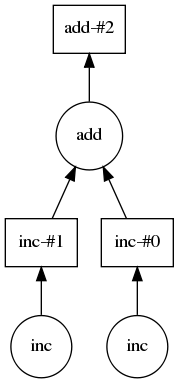

In [6]:
# why only 2 seconds?  We can see the task graph we made
z.visualize()

In [7]:
%%time
# here's a more complicated example w/ out Dask
data = range(8)
results = []
for x in data:
    y = inc(x)
    results.append(y)
total = sum(results)    

CPU times: user 7 ms, sys: 0 ns, total: 7 ms
Wall time: 8.01 s


In [8]:
%%time
# here's the Dask version
# TBF: on my machine this only 1/2's the time; why?
from dask import delayed
data = range(8)
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)
total = delayed(sum)(results)
total.compute()
total.visualize()

CPU times: user 11 ms, sys: 4 ms, total: 15 ms
Wall time: 4.13 s


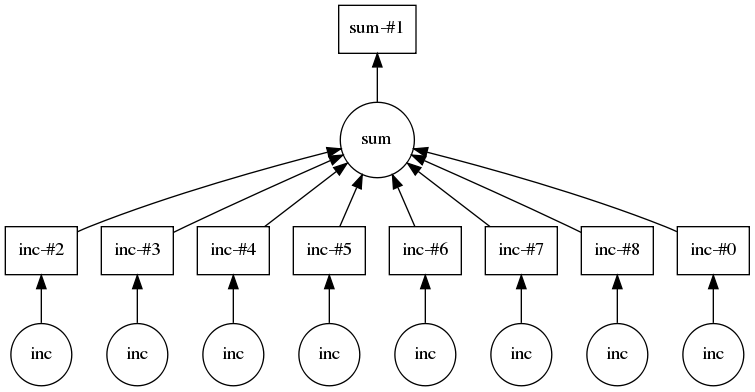

In [10]:
total.visualize()

## Jupyter

You are looking at this in a Jupyter Notebook.  You can get a single-user server setup pretty quickly for this.  Simply install jupyter in your virtual env., and then run 'jupyter notebook'.  Go to localhost:8888 by default and you're off.  That's how I got this notebook started.

But sharing that new notebook is a little more complicated.  Right now I'm trying to get this done by installing Jupyter Hub.